# Simulation

## Simulate the Pheno-type data

### 1. Choose $n = 20$ genes

In [1]:
import numpy as np
import pandas as pd
import os

In [20]:
print(os.getcwd())
print(os.listdir('./data'))
file = 'data/SNP_in_200GENE_chr1.csv'
data = pd.read_csv(file, error_bad_lines=False)


e:\OneDrive\Programming\Python\bio_informatics
['a.txt', 'Chr1First2000 - 副本.vcf', 'Chr1First2000.vcf', 'eg.vcf', 'filtered_test.vcf', 'selected_genes.csv', 'SNP_in_200GENE_chr1.csv', 'SNP_in_20GENE_chr1.csv', 'test.csv']


C:\Users\Archibald\AppData\Local\Temp\ipykernel_29016\2278546344.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file, error_bad_lines=False)


In [21]:
print(len(data))
data.head()

10297


,GENE,POS,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,ENSG00000227634,8269039,2,2,1,2,2,1,1,2,...,1,2,1,2,1,2,2,1,2,1
1,ENSG00000227634,8269341,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000227634,8269373,2,2,1,2,2,1,1,2,...,1,2,1,2,1,2,2,1,2,1
3,ENSG00000227634,8269650,2,2,1,2,2,1,1,2,...,1,2,1,1,1,2,2,1,2,1
4,ENSG00000227634,8269712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data['gene'] = data.GENE.astype('category')
data.head()

,GENE,POS,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,gene
0,ENSG00000227634,8269039,2,2,1,2,2,1,1,2,...,2,1,2,1,2,2,1,2,1,ENSG00000227634
1,ENSG00000227634,8269341,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000227634
2,ENSG00000227634,8269373,2,2,1,2,2,1,1,2,...,2,1,2,1,2,2,1,2,1,ENSG00000227634
3,ENSG00000227634,8269650,2,2,1,2,2,1,1,2,...,2,1,1,1,2,2,1,2,1,ENSG00000227634
4,ENSG00000227634,8269712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ENSG00000227634


In [23]:
data.groupby('gene').GENE.unique().sort_values()

gene
ENSG00000001461    [ENSG00000001461]
ENSG00000018625    [ENSG00000018625]
ENSG00000084070    [ENSG00000084070]
ENSG00000084072    [ENSG00000084072]
ENSG00000116147    [ENSG00000116147]
                         ...        
ENSG00000268172    [ENSG00000268172]
ENSG00000271647    [ENSG00000271647]
ENSG00000271810    [ENSG00000271810]
ENSG00000272084    [ENSG00000272084]
ENSG00000273002    [ENSG00000273002]
Name: GENE, Length: 136, dtype: object

In [24]:
# Selecting 20 Genes that have more than 100 SNPs
n = 20
counts = data.groupby('gene').size().sort_values(ascending=False) 
groups = counts[counts > 100].sample(n, replace = False, random_state = 1 ).index

print(groups)

CategoricalIndex(['ENSG00000116704', 'ENSG00000162378', 'ENSG00000162374',
                  'ENSG00000168710', 'ENSG00000121644', 'ENSG00000116353',
                  'ENSG00000237413', 'ENSG00000143190', 'ENSG00000203739',
                  'ENSG00000134198', 'ENSG00000153207', 'ENSG00000229956',
                  'ENSG00000198198', 'ENSG00000172380', 'ENSG00000143702',
                  'ENSG00000225006', 'ENSG00000117461', 'ENSG00000117602',
                  'ENSG00000143344', 'ENSG00000162688'],
                 categories=['ENSG00000001461', 'ENSG00000018625', 'ENSG00000084070', 'ENSG00000084072', 'ENSG00000116147', 'ENSG00000116353', 'ENSG00000116497', 'ENSG00000116704', ...], ordered=False, dtype='category', name='gene')


In [25]:
index = [i for i,x in enumerate(data['gene']) if x in groups]
data_selected = data.iloc[index, :]
print(len(data_selected))
data_selected.head()

5443


,GENE,POS,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,gene
331,ENSG00000117602,24830297,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,ENSG00000117602
332,ENSG00000117602,24831517,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,ENSG00000117602
333,ENSG00000117602,24832009,2,2,1,0,1,2,2,1,...,1,2,2,0,2,2,1,0,0,ENSG00000117602
334,ENSG00000117602,24835018,2,2,1,2,2,1,1,1,...,2,1,2,2,2,2,2,2,2,ENSG00000117602
335,ENSG00000117602,24835171,0,0,1,2,1,0,0,1,...,1,0,0,2,0,0,1,2,2,ENSG00000117602


In [26]:
data_selected.shape

(5443, 2551)

In [32]:
# get the group names
gene_names = list(data_selected.gene.unique())

data_selected['sign'] = 0

# Choose five SNPs as significant SNPs and 95 as small sigficance others are non-significant
for gene in gene_names:
    n = len(data_selected.loc[data_selected['gene'] == gene ,:])
    sign =  [1] * 100  + [0] * (n - 100)
    
    data_selected.loc[data_selected['gene'] == gene ,'sign'] = sign

C:\Users\Archibald\AppData\Local\Temp\ipykernel_29016\486112115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['sign'] = 0


In [43]:
d = 5
data_selected = data_selected.loc[data_selected['sign'] != 0,:]
data_selected['sign'][:d] = 2
data_selected.shape

C:\Users\Archibald\AppData\Local\Temp\ipykernel_29016\1514404415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['sign'][:d] = 2


(2000, 2552)

In [45]:
data_selected['sign'].head()

331    2
332    2
333    2
334    2
335    2
Name: sign, dtype: int64

### Get Beta

In [78]:
# Get Beta
np.random.seed(0)
data_selected['beta'] = 0
n = len(data_selected.loc[data_selected['sign'] == 2,'beta'])
print(n)
large_effect = 200
data_selected.loc[data_selected['sign'] == 2,'beta'] = np.random.normal(0, np.sqrt(large_effect), n)

n = len(data_selected.loc[data_selected['sign'] == 1,'beta'])
print(n)
small_effect = 3
data_selected.loc[data_selected['sign'] == 1,'beta'] = np.random.normal(0, np.sqrt(small_effect), n)

beta = data_selected.beta
print(beta[:10])
beta.shape

5
1995
331    24.947468
332     5.659078
333    13.841445
334    31.691016
335    26.411258
336    -1.692695
337     1.645601
338    -0.262158
339    -0.178780
340     0.711177
Name: beta, dtype: float64


(2000,)

In [105]:
from  sklearn.preprocessing import StandardScaler 
SNP = data_selected.drop(['GENE', 'POS', 'gene', 'beta'], axis=1).T
# ss = StandardScaler()
# SNP.loc[:,:] = ss.fit_teansform(X = SNP.loc[:,:])

SNP.head()


,331,332,333,334,335,336,337,338,339,340,...,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972
HG00096,2,2,2,2,0,0,2,0,2,0,...,1,1,1,0,1,0,1,0,0,0
HG00097,2,2,2,2,0,0,2,0,2,0,...,1,1,1,0,1,0,1,0,0,0
HG00099,2,2,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
HG00100,2,2,0,2,2,0,0,2,0,2,...,1,1,1,0,1,0,1,0,0,0
HG00101,2,2,1,2,1,0,1,1,1,1,...,1,1,1,0,1,0,1,0,0,0


In [94]:
SNP1 = SNP.copy()

In [106]:
temp = SNP1.values @ beta
print(temp.shape)
sigma_g2 = np.var(temp, ddof = 1) # get the overall variance
h2 = 0.5 # heritability
sigma_e2 = sigma_g2 * (1 - h2)/ h2
print("The sigma_g^2 is {:.5}, and sigma_e^2 is {:.5}".format(sigma_g2, sigma_e2))

(2549,)
The sigma_g^2 is 2609.2, and sigma_e^2 is 2609.2


Add bias term

In [20]:
np.random.seed(1)
beta0 = np.random.normal(0, np.sqrt(large_effect))
print(beta0)
print(beta.shape)
# beta_ = np.append(beta, beta0)
beta_ = np.insert(beta, 0, beta0)
print(beta_[:6])

NameError: name 'large_effect' is not defined

In [ ]:
SNP.insert(loc=0, column='bias', value=1)

In [109]:
residual = np.random.normal(0, np.sqrt(sigma_e2), len(SNP))
print(SNP.values.shape)
print(beta_.shape)
SNP['Y'] = SNP1.values @ beta + residual + beta0

(2549, 2001)
(2001,)


In [110]:
SNP.head()

,bias,331,332,333,334,335,336,337,338,339,...,9964,9965,9966,9967,9968,9969,9970,9971,9972,Y
HG00096,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,89.377100
HG00097,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,97.792189
HG00099,1,2,2,1,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,7.652598
HG00100,1,2,2,0,2,2,0,0,2,0,...,1,1,0,1,0,1,0,0,0,121.151941
HG00101,1,2,2,1,2,1,0,1,1,1,...,1,1,0,1,0,1,0,0,0,-18.198573


In [115]:
# Save Simulated Parameters and data
SNP.to_csv('data/Simulated_SNPs.csv')
np.savez('Parameters/simulated_parameters.npz', sigma_e2 =sigma_e2,sigma_g2 =sigma_g2, h2 = h2, beta = beta_, large_effect_terms = d)

## Working with K-folds

In [216]:
def get_folds_indices(nfolds, n_tr):
    if nfolds <= n_tr:
        fold_size = int(np.floor(n_tr/nfolds))
        resi = n_tr % nfolds
        fold_sizes = [0] + resi * [fold_size +1] + (nfolds - resi) * [fold_size]
        indices = np.cumsum(fold_sizes)
        folds_indices = [(indices[i], indices[i + 1])  for i in range(nfolds)]

    else:
        raise Exception("Number of folds is larger than numer of samples")
    print('First 5 fold indices : {}'.format(folds_indices[:5]))
    return folds_indices
    
def getHcv_for_Kfolds(X_tr, y_tr,  H_function, V = None, nfolds = 10):
    n_tr,p = X_tr.shape
    Hcv_k = np.zeros([n_tr,n_tr])
    
    folds_indices = get_folds_indices(nfolds = nfolds, n_tr = n_tr)
    for Kindices in folds_indices:
        ia,ib = Kindices
        indices_minus_K = list(range(0, ia)) + list(range(ib, n_tr))

        X_minus_K = X_tr[indices_minus_K,:]
        y_minus_K = y_tr[indices_minus_K]
        X_k = X_tr[ia:ib,:]
        y_K = y_tr[ia:ib]

        if V is not None:
            V_minus_k = V[indices_minus_K,:][:, indices_minus_K]
            temp = H_function(X_minus_K, X_k , y_minus_K, y_K, V_minus_k)
        else:
            temp = H_function(X_minus_K, X_k , y_minus_K, y_K)

        Hcv_k[ia:ib, indices_minus_K] = temp

    return Hcv_k

## Model Test

### 1. LMM (linear mixed model)
Let the model be
$$
Y_i = \sum_{j = 1}^{p} \beta_j X_{i,j} + u_i +\epsilon_i \ \text{where } i = 1, 2,3,\dots,n
$$
where $(u_1, u_2, \dots, u_n)^\top \sim MVN(0, \sigma_g^2 K ) $ and $\epsilon_i \sim ^{i.i.d} N(0, \sigma_e^2)$, and  $K = 1/p X X^\top$, $\sigma_e^2 = \frac{1 - h^2}{h^2} \sigma_g^2$ . 

> ? how to estimate $\sigma_e \text{ and } \sigma_g$?  Maybe using REML? But it requires the indication of the clusters.

We can write the model as 
$$
Y_i = \sum_{j = 1}^{p} \beta_j X_{i,j} + \epsilon_i^* \ \text{where } i = 1, 2,3,\dots,n \text{ and } \boldsymbol{\epsilon}^{*} = \boldsymbol u + \boldsymbol \epsilon \sim N_{n}(\mathbf{0}, V)
$$
where $V = Var(Y|X\beta) = \sigma^2_g K + \sigma^2_e I$

So we need to estimate two of  $\sigma_g, \sigma_e \text{or } h$

so we can get estimate for $\tilde{\boldsymbol{\beta}}:=\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1} \boldsymbol{Y}$

BLUP for $\tilde u = E(u|Y) = \sigma^2_g K V^{-1}(Y - X\tilde \beta)$

 And $\hat Y = X \tilde \beta + \tilde u$

Now we can define $H$ by

$H = X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1} + \sigma^2_g K V^{-1}(I - X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1})$


$$
\widehat{C V}_{c}=\frac{1}{n}\left(\boldsymbol{y}-H_{c v} \boldsymbol{y}\right)^{t}\left(\boldsymbol{y}-H_{c v} \boldsymbol{y}\right)+\frac{2}{n}\left[\operatorname{tr}\left(H_{c v} \operatorname{Cov}(\boldsymbol{y}, \boldsymbol{y})\right)-n \boldsymbol{h}_{t e} \operatorname{Cov}\left(\boldsymbol{y}_{t r}, y_{t e}\right)\right]
$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
if not 'SNP' in locals():
    SNP = pd.read_csv('data/Simulated_SNPs.csv', index_col=0)
par = np.load('Parameters/simulated_parameters.npz')
sigma_e2, sigma_g2, h2, beta, num_large_effet_terms = [par[params] for params in par.files]
sigma_g2 = float(sigma_g2)
sigma_e2 = float(sigma_e2)
h2 = float(h2)
SNP.head()

,bias,331,332,333,334,335,336,337,338,339,...,9964,9965,9966,9967,9968,9969,9970,9971,9972,Y
HG00096,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,89.377100
HG00097,1,2,2,2,2,0,0,2,0,2,...,1,1,0,1,0,1,0,0,0,97.792189
HG00099,1,2,2,1,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,7.652598
HG00100,1,2,2,0,2,2,0,0,2,0,...,1,1,0,1,0,1,0,0,0,121.151941
HG00101,1,2,2,1,2,1,0,1,1,1,...,1,1,0,1,0,1,0,0,0,-18.198573


In [3]:
beta[:num_large_effet_terms+1]

array([22.97171243, 24.94746752,  5.65907751, 13.84144531, 31.69101554,
       26.41125838])

Get $V = Var(Y|X\beta) = \sigma^2_g K + \sigma^2_e I$ where $K = 1/p X X^\top$

In [4]:
from sklearn.model_selection import train_test_split
SNP_ = SNP.copy()
SNP_.drop('Y', inplace= True, axis = 1)
data = SNP_.values
G_tr, G_te, y_tr, y_te = train_test_split(data, SNP['Y'].to_numpy().reshape([-1,1]), test_size = 0.2, random_state = 123)
X_tr, X_te = G_tr[:, :num_large_effet_terms+1], G_te[:, :num_large_effet_terms+1]
W_tr, W_te = G_tr[:, 1:], G_te[:, 1:]

In [5]:
print(y_tr.shape, X_tr.shape, W_tr.shape, y_te.shape, X_te.shape, W_te.shape)

(2039, 1) (2039, 6) (2039, 2000) (510, 1) (510, 6) (510, 2000)


#### Using FAST_LMM to estimate sigma_g2 and sigma_e2

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
# from FAST_LMM import utils as u
sc = W_tr.shape[1]
from FAST_LMM import FASTLMM
fast = FASTLMM(lowRank=True, REML = True)
fast.fit(X_tr, y_tr, 1/np.sqrt(sc) * W_tr)

import uitls from the calling time
------------- FAST-LMM------------------
LowRank is set as True, using REML
Rank of W is 1673, shape of W is (2039, 2000).
Optimization Results:
Delta is calculated as:  0.5955727153476151
Maximum REML is calculated as:  -11030.798258070256
---------------Summary------------------
LowRank is set as True, using REML
Heritability h2: 0.6267342067090548
Sigma_g2: 4407.204534663662
Sigma_e2: 2624.81077180196
------ 5.080962181091309 seconds ------


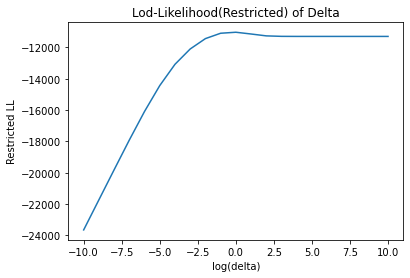

In [64]:
fast.plot_likelihood()

In [65]:
#using theoreatical sigma
# fast.sigma_e2 = sigma_e2
# fast.sigma_g2 = sigma_g2

print('h2 = ', 1/(1+fast.delta) )
n, sc = W_tr.shape
varYhat = np.mean(np.diag(1/ sc * sigma_g2* W_tr @ W_tr.T + sigma_e2 * np.identity(n)))
varYhat2 = np.mean(np.diag(1/ sc * fast.sigma_g2* W_tr @ W_tr.T + fast.sigma_e2 * np.identity(n)))
varY = np.var(y_tr - X_tr @ beta[ :num_large_effet_terms+1], ddof = 0)
print(varYhat, varYhat2, varY)

h2 =  0.6267342067090548
5437.275694279155 7401.588262106941 5851.42411622923


In [53]:
n_te, sc_te = W_te.shape
y_te_hat = fast.predict(X_te,  1/np.sqrt(sc_te)* W_te)
y_tr_hat = fast.predict(X_tr, 1/np.sqrt(sc)* W_tr)

In [54]:
y_tr_hat_wls = X_tr @ fast.beta
y_te_hat_wls = X_te @ fast.beta

In [43]:
tr_error = 1/n * (np.sum(np.square(y_tr_hat - y_tr)))
te_error = 1/n_te * (np.sum(np.square(y_te_hat - y_te)))
tr_error_wls = 1/n * (np.sum(np.square(y_tr_hat_wls - y_tr)))
te_error_wls = 1/n_te * (np.sum(np.square(y_te_hat_wls - y_te)))
print('LMM: training error is:', tr_error, ' test error is:', te_error)
print('WLS: training error is:', tr_error_wls, ' test error is:', te_error_wls)


LMM: training error is: 2406.141720451171  test error is: 3124.1619371842025
WLS: training error is: 4070.0083771106006  test error is: 4487.270237840345


#### Comparison of training and test error of using LMM, OLS, WLS
First we calculate $H_{tr, LMM}$, which is $H = X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1} + \sigma^2_g K V^{-1}(I - X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1})$

Then we calculate $H_{tr, WLS}$, which is $H = X\left(X^{t} V^{-1} X\right)^{-1} X^{t} V^{-1}$.

Finally we calculate $H_{tr, WLS}$, which is $H = X\left(X^{t} X\right)^{-1} X^{t}$.

In [55]:
from FAST_LMM.FAST_LMM import utils as u
n_tr,sc = W_tr.shape
V_inv = fast.sigma_g2 / sc * W_tr @ W_tr.T + fast.sigma_e2 * np.identity(X_tr.shape[0])
inverse_part = u.inv(X_tr.T @ fast.V_inv() @ X_tr)

K = W_tr @ W_tr.T /sc
H_wls = X_tr @ inverse_part @ X_tr.T @ fast.V_inv()
add2 = sigma_g2 * K @ fast.V_inv() @ (np.identity(n_tr) - H_wls)
H_lmm = H_wls + add2
H_ols = X_tr @ u.inv(X_tr.T @ X_tr)@ X_tr.T

In [59]:
y_tr_hat_lmm = H_lmm @ y_tr
y_tr_hat_wls = H_wls @ y_tr
y_tr_hat_ols = H_ols @ y_tr 


tr_error_lmm = 1/n_tr * (np.sum((y_tr - y_tr_hat)**2))
tr_error_ols = 1/n_tr * (np.sum((y_tr - y_tr_hat_ols)**2))
tr_error_wls = 1/n_tr * (np.sum((y_tr - y_tr_hat_wls)**2))

print('Training error of lmm is {:.2f}, wls error is {:.2f}, ols error is {:.2f}, sigma_e2 is {:.2f}'.format(
    tr_error_lmm, tr_error_wls, tr_error_ols, fast.sigma_e2))
print('The ratio is {:.2f} : {:.2f} : {:.2f}'.format(1, te_error_wls/tr_error_lmm, tr_error_ols/tr_error_lmm))

Training error of lmm is 2412.40, wls error is 4065.82, ols error is 3935.42, sigma_e2 is 2609.24
The ratio is 1.00 : 1.86 : 1.63


In [57]:
n_tr,sc = W_tr.shape
# V = fast.sigma_g2 / sc * W_tr @ W_tr.T + fast.sigma_e2 * np.identity(X_tr.shape[0])
inverse_part = u.inv(X_tr.T @ fast.V_inv() @ X_tr)

H_wls_te = X_te @ inverse_part @ X_tr.T @ fast.V_inv()
K_te_tr = W_te @ W_tr.T /sc
add2 = sigma_g2 * K_te_tr @ fast.V_inv() @ (np.identity(n_tr) - H_wls)
H_lmm_te = H_wls_te + add2
H_ols_te = X_te @ u.inv(X_tr.T @ X_tr)@ X_tr.T

In [58]:
y_te_hat_lmm = H_lmm_te @ y_tr
y_te_hat_wls = H_wls_te @ y_tr
y_te_hat_ols = H_ols_te @ y_tr

te_error_lmm = 1/n_te * (np.sum((y_te - y_te_hat_lmm)**2))
te_error_ols = 1/n_te * (np.sum((y_te - y_te_hat_ols)**2))
te_error_wls = 1/n_te * (np.sum((y_te - y_te_hat_wls)**2))

print('test error of lmm is {:.2f}, wls error is {:.2f}, ols error is {:.2f}, sigma_e2 is {:.2f}'.format(
    te_error_lmm, te_error_wls, te_error_ols, fast.sigma_e2))
print('The ratio is {:.2f} : {:.2f} : {:.2f}'.format(1, te_error_wls/te_error_lmm, te_error_ols/te_error_lmm))

test error of lmm is 3125.19, wls error is 4482.01, ols error is 4301.22, sigma_e2 is 2609.24
The ratio is 1.00 : 1.43 : 1.38


In [49]:
V_tr_te = 1/sc * W_tr @ W_te.T * sigma_g2
w_lmm = 2 *( 1/n_tr * np.trace(H_lmm @ fast.V()) - 1/ n_te * np.trace(H_lmm_te @ V_tr_te))
w_wls = 2 *( 1/n_tr * np.trace(H_wls @ fast.V()) - 1/ n_te * np.trace(H_wls_te @ V_tr_te))
w_ols = 2 *( 1/n_tr * np.trace(H_ols @ fast.V()) - 1/ n_te * np.trace(H_ols_te @ V_tr_te))


tr_error_lmm_c = tr_error_lmm + w_lmm
tr_error_wls_c = tr_error_wls + w_wls
tr_error_ols_c = tr_error_ols + w_ols

print('The training error of     lmm is {}, wls is {}, and ols is {}'.format(tr_error_lmm, tr_error_wls, tr_error_ols))
print('The corrected tr error of lmm is {}, wls is {}, and ols is {}'.format(tr_error_lmm_c, tr_error_wls_c, tr_error_ols_c))
print('The test error of         lmm is {}, wls is {}, and ols is {}'.format(te_error_lmm, te_error_wls, te_error_ols))

The training error of     lmm is 2406.141720451171, wls is 4070.0083771106233, and ols is 3935.421037480194
The corrected tr error of lmm is 2923.152277367677, wls is 4087.9984811646773, and ols is 3981.954523067176
The test error of         lmm is 3124.1619371842066, wls is 4487.270237840382, and ols is 4301.224827649088


#### Leave One out Cross-validation error of LMM WLS and OLS

##### Using theoretical sigma values

In [81]:
print('sigma_e2: ', sigma_e2, ' sigma_g2: ', sigma_g2)

sigma_e2:  2609.2370423738284  sigma_g2:  2609.2370423738284


In [266]:
n_tr,sc = W_tr.shape
V = sigma_g2 / sc * W_tr @ W_tr.T + sigma_e2 * np.identity(n_tr)

H_cv_lmm = np.zeros([n_tr,n_tr])
H_cv_wls = np.zeros([n_tr,n_tr])
H_cv_ols = np.zeros([n_tr,n_tr])

H_cv_temp = np.zeros([n_tr,n_tr-1])
# V_minusi_inv_storage = np.zeros([n_tr,n_tr-1,n_tr-1]) 
# Store the inverse of Variance to reduce time consumpution 
# Storge comsumption will be too large

for i in range(n_tr):
    indices_mi= list(range(n_tr))
    indices_mi.remove(i)
    V_minusi_inv = u.inv(V[indices_mi,:][:,indices_mi]) 
    X_minusi = X_tr[indices_mi, :]

    inverse1 = u.inv(X_minusi.T @ V_minusi_inv @ X_minusi)
    inverse2 = u.inv(X_minusi.T @  X_minusi)

    beta_temp = inverse1 @ X_minusi.T @ V_minusi_inv
    temp = X_tr[i,:] @ beta_temp
    # H_cv_temp[i, ] = temp
    H_cv_temp = X_minusi @ beta_temp

    H_cv_wls[i, indices_mi] = temp
    H_cv_lmm[i, indices_mi] = temp + \
        V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @\
             (np.identity(n_tr - 1) - H_cv_temp)

    H_cv_ols[i, indices_mi] = X_tr[i,:] @ inverse2 @ X_minusi.T 

# for i in range(n_tr):
#     indices_mi= list(range(n_tr))
#     indices_mi.remove(i)
#     H_cv_lmm[i, indices_mi] = H_cv_wls[i, indices_mi] + \
#         V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @ (np.identity(n_tr - 1) - H_cv_temp[indices_mi,: ])

np.savez('Parameteres/H_cv LMM.npz', H_cv_ols = H_cv_ols,H_cv_wls = H_cv_wls, H_cv_lmm= H_cv_lmm)


In [82]:
fast.summary()

------------------------------------
LowRank is set as True, using REML
Rank of W is 1673.
delta: 0.5955727153476151
Heritability h2: 0.6267342067090548
Sigma_g2: 4407.204534663662
Sigma_e2: 2624.81077180196


In [267]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols @ y_tr)))



V_inv = fast.V_inv()
# using theoretical sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * sigma_g2 * W_tr @ W_te.T

H_te_wls = X_te @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V(sigma_g2 = sigma_g2, sigma_e2 = sigma_e2)
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

55.6258332103107
The CV error of   lmm is 2872.5647399580994, wls is 4021.7656889703244, and ols is 3958.7607906402673
The CVc error of  lmm is 2928.19057316841, wls is 4024.6738744738504, and ols is 3985.3067672016114
The test error of lmm is 3147.380021381683, wls is 4394.554386231235, and ols is 4301.224827649088


##### Using estimated sigma value

In [83]:
fast.summary()

------------------------------------
LowRank is set as True, using REML
Rank of W is 1673.
delta: 0.5955727153476151
Heritability h2: 0.6267342067090548
Sigma_g2: 4407.204534663662
Sigma_e2: 2624.81077180196


In [268]:
n_tr,sc = W_tr.shape
V = fast.sigma_g2 / sc * W_tr @ W_tr.T + fast.sigma_e2 * np.identity(n_tr)

H_cv_lmm2 = np.zeros([n_tr,n_tr])
H_cv_wls2 = np.zeros([n_tr,n_tr])
H_cv_ols2 = np.zeros([n_tr,n_tr])

H_cv_temp = np.zeros([n_tr,n_tr-1])
# V_minusi_inv_storage = np.zeros([n_tr,n_tr-1,n_tr-1]) 
# Store the inverse of Variance to reduce time consumpution 
# Storge comsumption will be too large

for i in range(n_tr):
    indices_mi= list(range(n_tr))
    indices_mi.remove(i)
    V_minusi_inv = u.inv(V[indices_mi,:][:,indices_mi]) 
    X_minusi = X_tr[indices_mi, :]

    inverse1 = u.inv(X_minusi.T @ V_minusi_inv @ X_minusi)
    inverse2 = u.inv(X_minusi.T @  X_minusi)

    beta_temp = inverse1 @ X_minusi.T @ V_minusi_inv
    temp = X_tr[i,:] @ beta_temp
    H_cv_temp = X_minusi @ beta_temp

    H_cv_wls2[i, indices_mi] = temp
    H_cv_lmm2[i, indices_mi] = temp + \
        V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @\
             (np.identity(n_tr - 1) - H_cv_temp)

    H_cv_ols2[i, indices_mi] = X_tr[i,:] @ inverse2 @ X_minusi.T 
#   H_cv_temp[i, ] = temp

# for i in range(n_tr):
#     indices_mi= list(range(n_tr))
#     indices_mi.remove(i)
#     H_cv_lmm[i, indices_mi] = H_cv_wls[i, indices_mi] + \
#         V[i, indices_mi] @ u.inv(V[indices_mi,:][:,indices_mi])  @ (np.identity(n_tr - 1) - H_cv_temp[indices_mi,: ])

np.savez('Parameteres/H_cv LMM2.npz', H_cv_ols = H_cv_ols2,H_cv_wls = H_cv_wls2, H_cv_lmm= H_cv_lmm2)

In [269]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm2 @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls2 @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols2 @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te.T

H_te_wls = X_te @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm2 @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls2 @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols2 @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te - H_te_ols @ y_tr)))

print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 2863.589204967364, wls is 4086.1420579337737, and ols is 3958.7607906402673
The CVc error of  lmm is 2955.5977630071848, wls is 4089.113084571088, and ols is 4002.1606211191156
The test error of lmm is 3125.187171464316, wls is 4482.009660400972, and ols is 4301.224827649088


#### Testing with null space of w_tr testing data

In [126]:
from scipy.linalg import null_space
null_V = null_space(W_tr)

In [147]:
W_te_in_null_V = null_V.T
n_te_in_null_V = W_te_in_null_V.shape[0]
X_te_in_null_V = np.concatenate([np.ones([n_te_in_null_V,1]), W_te_in_null_V[:, :num_large_effet_terms]], axis = 1)
np.random.seed(0)
epsilon = np.random.normal(0, np.sqrt(sigma_e2), n_te_in_null_V)
y_te_in_null_V = W_te_in_null_V @ beta[1:]  + beta[0] + epsilon

In [151]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm2 @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls2 @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols2 @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te_in_null_V.T

H_te_wls = X_te_in_null_V @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te_in_null_V @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm2 @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls2 @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols2 @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te_in_null_V - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te_in_null_V - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te_in_null_V - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 3166.1290499916586, wls is 4086.1420579337723, and ols is 3958.7607906402673
The CVc error of  lmm is 10967.655802624773, wls is 6582.661526050029, and ols is 10643.766022072985
The test error of lmm is 777484.2286892927, wls is 777484.2286892927, and ols is 715767.2650530639


#### Testing with random generated test data

In [153]:
np.random.seed(0)
W_te_random = np.random.choice([0,1,2], [n_te, sc])
X_te_random = np.concatenate([np.ones([n_te,1]), W_te_random[:, :num_large_effet_terms]], axis = 1)
epsilon = np.random.normal(0, np.sqrt(sigma_e2), n_te)
y_te_random = W_te_random@ beta[1:]  + beta[0] + epsilon

In [156]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm2 @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls2 @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols2 @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te_random.T

H_te_wls = X_te_random @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te_random @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm2 @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls2 @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols2 @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te_random - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te_random - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te_random - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 3166.1290499916586, wls is 4086.1420579337723, and ols is 3958.7607906402673
The CVc error of  lmm is 3088.5540679543146, wls is 4446.571102554026, and ols is 4848.4583546978365
The test error of lmm is 7007735.62992001, wls is 6988273.477089207, and ols is 7136313.608272911


In [176]:
y_te_random_hat = X_te_random @ u.inv(X_te_random.T @ X_te_random) @ X_te_random.T @ y_te_random
print(y_te_random_hat.shape)
np.sum(np.square(y_te_random_hat - y_te_random))

(510,)


3434438.8720892463

#### CV with k folds

In [201]:
y_tr[list(range(5))+ list(range(8, n_tr))].shape

(2036, 1)

In [237]:
def H_function_ols(X_minus_k, X_k, y_minus_k, y_k ):
    return X_k @ u.inv(X_minus_k.T @ X_minus_k) @ X_minus_k.T

H_cv_ols_k = getHcv_for_Kfolds(X_tr, y_tr, H_function_ols, nfolds = n_tr )

First 5 fold indices : [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]


In [253]:
def H_function_wls(X_minus_k, X_k, y_minus_k, y_k, V):
    V_inv = u.inv(V)
    inverse = u.inv(X_minus_k.T @ V_inv @ X_minus_k) 
    return X_k @ inverse @ X_minus_k.T @ V_inv

H_cv_wls_k = getHcv_for_Kfolds(X_tr, y_tr, H_function_wls, fast.V(), nfolds = 10)


First 5 fold indices : [(0, 204), (204, 408), (408, 612), (612, 816), (816, 1020)]


In [264]:
H_cv_lmm_k = np.zeros([n_tr, n_tr])
V_inv = fast.V_inv()
inverse = u.inv (X_tr.T @ V_inv @ X_tr)
H_cv_temp = X_tr @ inverse @ X_tr.T @ V_inv

folds_indices = get_folds_indices(10, n_tr)
# get H_temp
for Kindices in folds_indices:
    ia,ib = Kindices
    indices_minus_K = list(range(0, ia)) + list(range(ib, n_tr))

    V_minus_k = V[indices_minus_K,:][:, indices_minus_K]
    X_k = X_tr[ia:ib,:]
    X_minus_k = X_tr[indices_minus_K,]

    V_inv = u.inv(V_minus_k)

    H_cv_temp = X_minus_k @ inverse @ X_minus_k.T @ V_inv

    # inverse = u.inv(X_minus_k.T @ V_inv @ X_minus_k) 

    # temp =  X_k @ inverse @ X_minus_k.T @ V_inv
    # H_cv_temp.append(temp)
    
    temp_u= V[ia:ib, indices_minus_K] @ u.inv(V_minus_k) @(
        np.identity(n_tr - (ib - ia)) - H_cv_temp #[indices_minus_K,:][:, indices_minus_K]
    )

    H_cv_lmm_k[ia:ib, indices_minus_K] = H_cv_wls_k[ia:ib, indices_minus_K] + temp_u


First 5 fold indices : [(0, 204), (204, 408), (408, 612), (612, 816), (816, 1020)]


In [265]:
# Using Test Error to estimate the Generalization error
Error_cv_lmm = 1/n_tr * (np.sum(np.square(y_tr - H_cv_lmm_k @ y_tr)))
Error_cv_wls = 1/n_tr * (np.sum(np.square(y_tr - H_cv_wls_k @ y_tr)))
Error_cv_ols = 1/n_tr * (np.sum(np.square(y_tr - H_cv_ols_k @ y_tr)))



V_inv = fast.V_inv()
# using estimated sigma_g2 to get the Covariance(y_tr, y_te)
V_tr_te = 1/sc * fast.sigma_g2 * W_tr @ W_te.T

H_te_wls = X_te @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv
H_te_lmm = H_te_wls + V_tr_te.T @ V_inv @ (np.identity(n_tr) - X_tr @ u.inv(X_tr.T @ V_inv @ X_tr) @ X_tr.T @ V_inv) 
H_te_ols = X_te @ u.inv(X_tr.T @ X_tr) @ X_tr.T

V = fast.V()
Correction_lmm = 2 * (1/n_tr * np.trace(H_cv_lmm_k @ V) - 1/n_te * np.trace(H_te_lmm @ V_tr_te))
Correction_wls = 2 * (1/n_tr * np.trace(H_cv_wls_k @ V) - 1/n_te * np.trace(H_te_wls @ V_tr_te))
Correction_ols = 2 * (1/n_tr * np.trace(H_cv_ols_k @ V) - 1/n_te * np.trace(H_te_ols @ V_tr_te))

Error_cv_lmm_c = Error_cv_lmm + Correction_lmm
Error_cv_wls_c = Error_cv_wls + Correction_wls
Error_cv_ols_c = Error_cv_ols + Correction_ols

Error_te_lmm = 1/n_te *(np.sum(np.square(y_te - H_te_lmm @ y_tr)))
Error_te_wls = 1/n_te *(np.sum(np.square(y_te - H_te_wls @ y_tr)))
Error_te_ols = 1/n_te *(np.sum(np.square(y_te - H_te_ols @ y_tr)))



print('The CV error of   lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm, Error_cv_wls, Error_cv_ols))
print('The CVc error of  lmm is {}, wls is {}, and ols is {}'.format(Error_cv_lmm_c, Error_cv_wls_c, Error_cv_ols_c))
print('The test error of lmm is {}, wls is {}, and ols is {}'.format(Error_te_lmm, Error_te_wls, Error_te_ols))

The CV error of   lmm is 2924.597316831033, wls is 4156.506837943065, and ols is 3958.7607906402673
The CVc error of  lmm is 3084.366379786584, wls is 4252.30842376592, and ols is 4002.1606211191156
The test error of lmm is 3125.187171464316, wls is 4482.009660400972, and ols is 4301.224827649088


### Ridge


$$
Q(\boldsymbol{\beta})=\frac{1}{n}(\mathbf{y}-\mathbf{X} \boldsymbol{\beta})^{\prime}(\mathbf{y}-\mathbf{X} \boldsymbol{\beta})+ \lambda ||{\beta}||_2
$$

$$
\hat \beta = \left(X^\top X +n \lambda \mathbf{I} \right)^{-1} X^{\top} Y
$$

So the 
$$
\hat Y = H Y = X \left(X^\top X + n\lambda \mathbf{I} \right)^{-1} X^{\top} Y
$$


##### Training and testing error of Ridge

In [272]:
n_tr,p = X_tr.shape

nlamb = 10
beta_without_y = u.inv(X_tr.T @ X_tr + nlamb * np.identity(p)) @ X_tr.T
beta_hat_ridge = beta_without_y @ y_tr
H_tr_ridge = X_tr @ beta_without_y
H_te_ridge = X_te @ beta_without_y
y_tr_hat_ridge = H_tr_ridge @ y_tr
y_te_hat_ridge = H_te_ridge @ y_tr 

tr_error_ridge = 1/n_tr * np.sum((y_tr-y_tr_hat_ridge) ** 2)
te_error_ridge = 1/n_te * np.sum((y_te-y_te_hat_ridge) ** 2)

Correction_ridge = 2 * (1/n_tr * np.trace(H_tr_ridge @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
tr_error_ridge_c = tr_error_ridge + Correction_lmm
print('training error of ridge is {:.2f}, test error is {:.2f}, corrected training error is {:.2f}'.
    format(tr_error_ridge, te_error_ridge, tr_error_ridge_c))

training error of ridge is 3937.30, test error is 4296.72, corrected training error is 4029.31


In [121]:
print('training error of ridge is {:.2f}, test error is {:.2f}, sigma_e2 is {:.3f}'.format(tr_error_ridge, te_error_ridge, sigma_e2))

training error of ridge is 1629.12, test error is 5291.02, sigma_e2 is 3321.627


##### LOO Cross-valication 

In [347]:
n_tr,p = X_tr.shape
H_cv_ridge = np.zeros([n_tr,n_tr])

lamb = 100 
for i in range(n_tr):
    indices_mi= list(range(n_tr))
    indices_mi.remove(i)
    X_minusi = X_tr[indices_mi, :]
    inverse = u.inv(X_minusi.T @  X_minusi + lamb * np.diag(np.ones(p)) )

    temp = X_tr[i,:] @ inverse @ X_minusi.T  
    H_cv_ridge[i, indices_mi] = temp

np.savez('Parameters/H_cv ridge.npz', H_cv_ridge = H_cv_ridge)

In [279]:
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge @ y_tr)**2))

H_te_ridge = X_te @ u.inv(X_tr.T @ X_tr + lamb * np.identity(p)) @ X_tr.T
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (np.trace(H_cv_ridge @ V)/n_tr - np.trace(H_te_ridge @ V_tr_te) /n_te)
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print('The CV error and CVc error and test error of ridge are {:.2f}, {:.2f}, {:.2f}'
.format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

The CV error and CVc error and test error of ridge are 3971.16, 4005.64, 4310.60


##### CV with k folds

In [295]:
 
def H_function_ridge(X_minus_k, X_k, y_minus_k, y_k ):

    return X_k @ u.inv(X_minus_k.T @ X_minus_k + lamb * np.identity(X_minus_k.shape[1])) @ X_minus_k.T

H_cv_ridge_k = getHcv_for_Kfolds(X_tr, y_tr, H_function_ridge, nfolds = 2)

First 5 fold indices : [(0, 1020), (1020, 2039)]


In [299]:
V = fast.V()
V_tr_te = 1/sc * fast.sigma_g2* W_tr @ W_te.T
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge_k @ y_tr)**2))

H_te_ridge = X_te @ u.inv(X_tr.T @ X_tr + lamb * np.identity(p)) @ X_tr.T
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (1/n_tr*np.trace(H_cv_ridge_k @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print('The CV error and CVc error and test error of ridge are {:.2f}, {:.2f}, {:.2f}'
.format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

The CV error and CVc error and test error of ridge are 4005.21, 3981.10, 4310.60


In [331]:
sigma_g2_test = sigma_g2 
# using theoretical sigma
# V = fast.V(sigma_g2=sigma_g2_test, sigma_e2 = sigma_e2)
V =  1/sc * sigma_g2_test * W_tr @ W_tr.T + sigma_e2 * np.identity(X_tr.shape[0])
V_tr_te = 1/sc * sigma_g2_test * W_tr @ W_te.T
Error_cv_ridge = 1/n_tr * (np.sum((y_tr - H_cv_ridge_k @ y_tr)**2))

H_te_ridge = X_te @ u.inv(X_tr.T @ X_tr + lamb * np.identity(p)) @ X_tr.T
Error_te_ridge = 1/n_te * (np.sum((y_te - H_te_ridge @ y_tr)**2))


Correction_ridge = 2  * (1/n_tr*np.trace(H_cv_ridge_k @ V) - 1/n_te * np.trace(H_te_ridge @ V_tr_te))
Error_cv_ridge_c = Error_cv_ridge + Correction_ridge

print(Correction_ridge)
print('The CV error and CVc error and test error of ridge are {:.2f}, {:.2f}, {:.2f}'
.format(Error_cv_ridge, Error_cv_ridge_c, Error_te_ridge))

-14.747054866241797
The CV error and CVc error and test error of ridge are 4005.21, 3990.46, 4310.60
